In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics
import warnings; warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("IPL.csv")

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
remove_columns = ['striker', 'non-striker', 'mid', 'batsman', 'bowler']
df.drop(labels = remove_columns, axis=1, inplace=True)

In [5]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


Text(0.5, 1.0, 'Correlation between continuous variables')

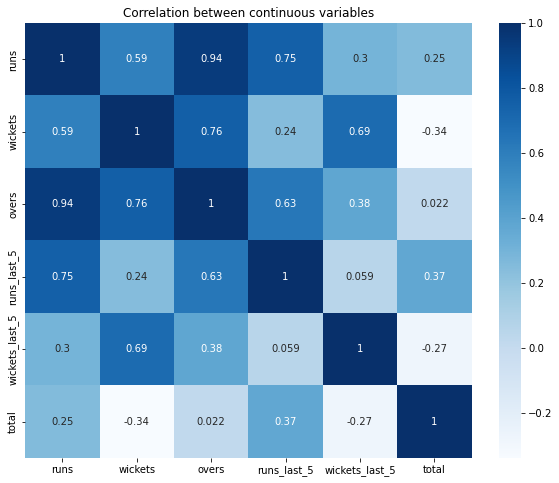

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation between continuous variables")

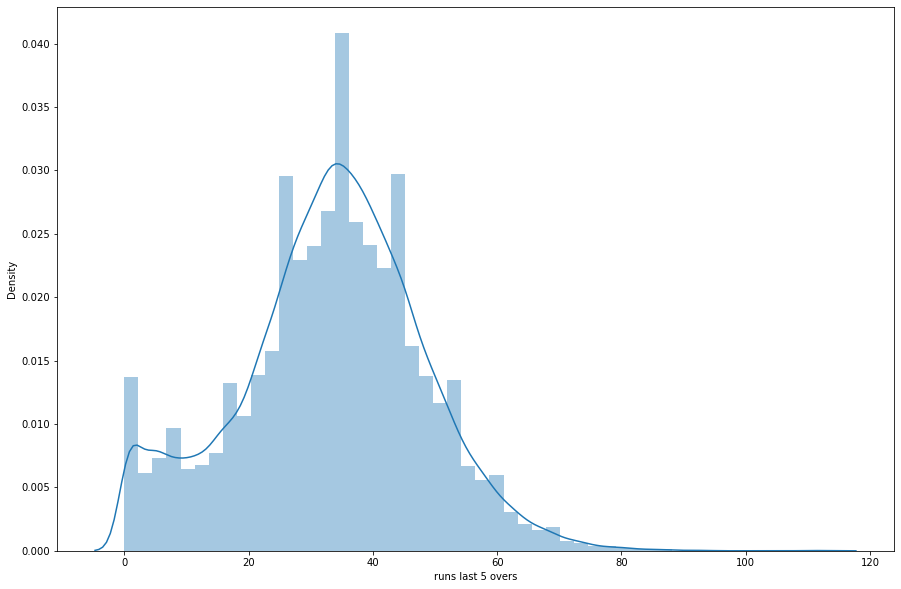

In [7]:
plt.figure(figsize=(15,10))
sns.distplot(x=df["runs_last_5"])
plt.xlabel("runs last 5 overs")
plt.show()

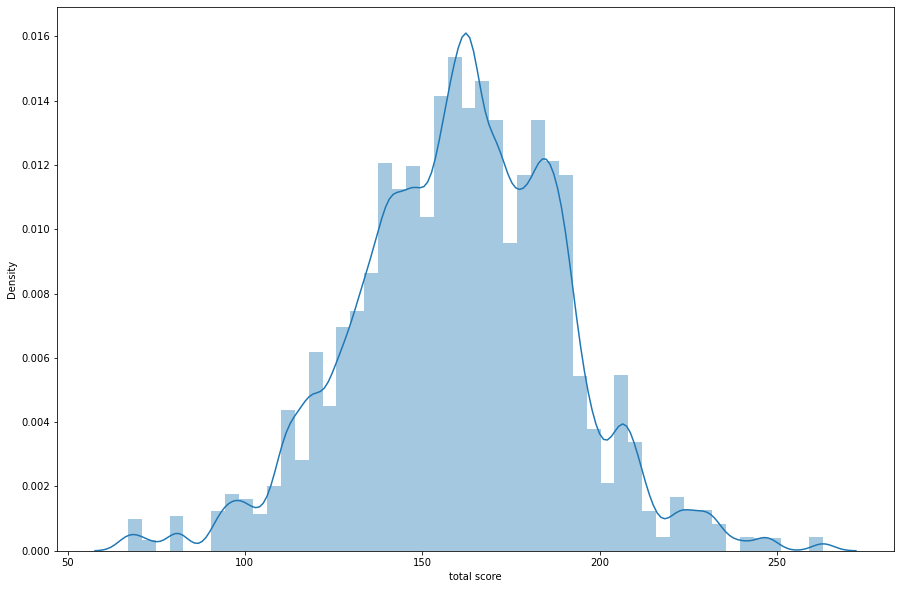

In [8]:
plt.figure(figsize=(15,10))
sns.distplot(x=df["total"])
plt.xlabel("total score")
plt.show()

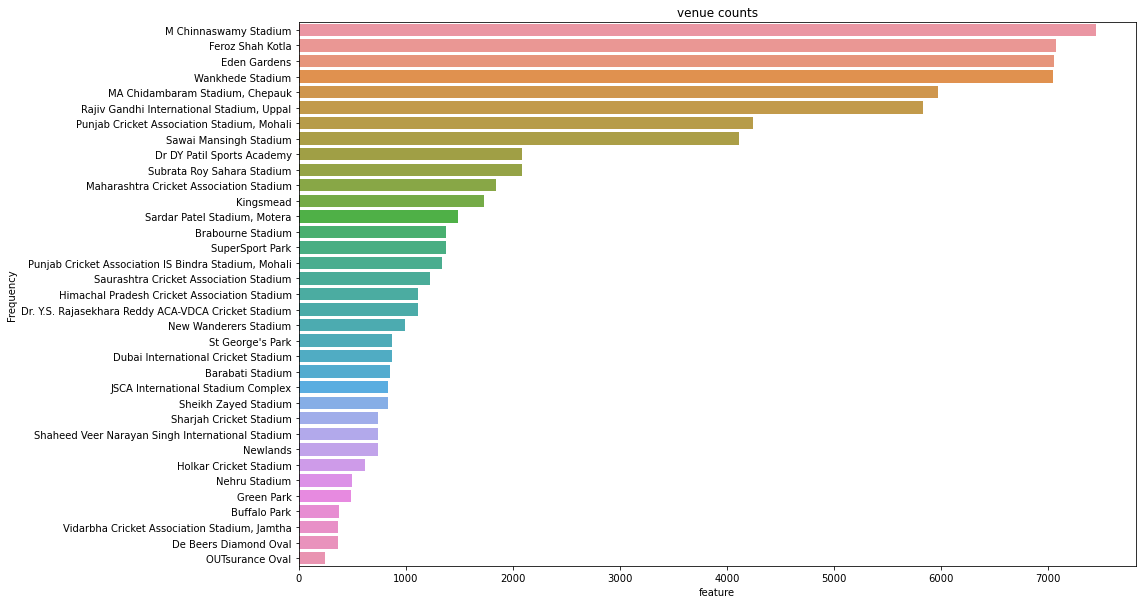

In [9]:
a = df["venue"].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(y=a.index,x=a.values)
plt.title("venue counts")
plt.xlabel("feature")
plt.ylabel("Frequency")
plt.show()

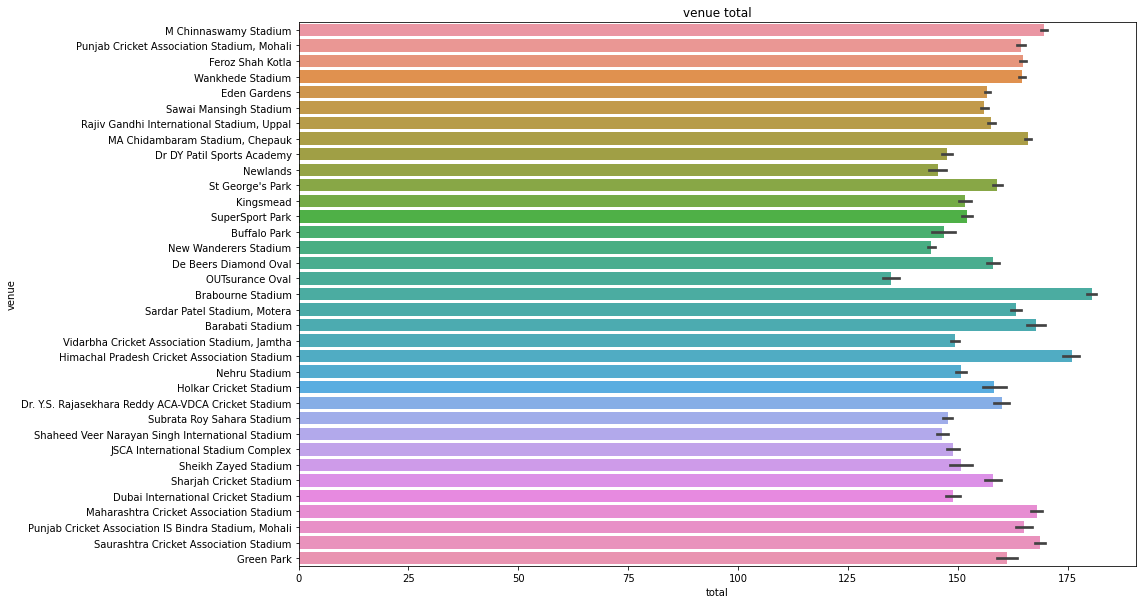

In [10]:
plt.figure(figsize=(15,10))
sns.barplot(y=df["venue"],x=df['total'])
plt.title("venue total")
plt.xlabel("total")
plt.ylabel("venue")
plt.show()

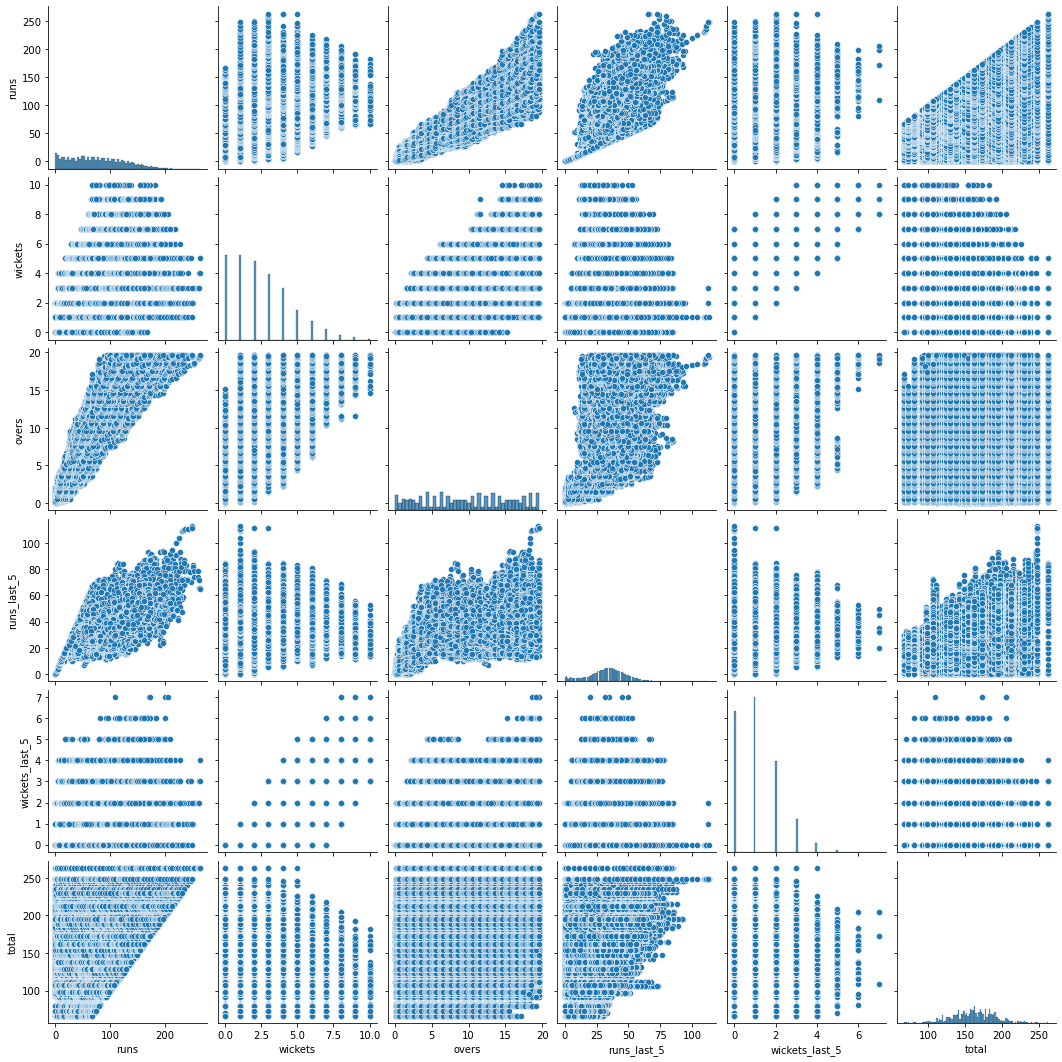

In [11]:
sns.pairplot(df)

In [27]:
df.columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [28]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [29]:
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Sunrisers Hyderabad']

In [30]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [31]:
# To see most used stadiums
df['count'] = 1
df.groupby(['venue']).count()['count']

venue
Barabati Stadium                                         856
Brabourne Stadium                                       1380
Buffalo Park                                             380
De Beers Diamond Oval                                    368
Dr DY Patil Sports Academy                              2088
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     1113
Dubai International Cricket Stadium                      868
Eden Gardens                                            7049
Feroz Shah Kotla                                        7068
Green Park                                               492
Himachal Pradesh Cricket Association Stadium            1115
Holkar Cricket Stadium                                   617
JSCA International Stadium Complex                       837
Kingsmead                                               1731
M Chinnaswamy Stadium                                   7443
MA Chidambaram Stadium, Chepauk                         5972
Maharashtra Cricke

In [32]:
df.drop(labels=['count'], axis=1, inplace=True)

In [33]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [34]:
current_venues = ['M Chinnaswamy Stadium','Eden Gardens', 'Feroz Shah Kotla', 'MA Chidambaram Stadium, Chepauk',
       'Punjab Cricket Association Stadium, Mohali', 
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal']

In [35]:
df = df[(df['bat_team'].isin(current_teams)) &(df['bowl_team'].isin(current_teams))]

In [36]:
df = df[(df['venue'].isin(current_venues))]

In [37]:
df = df[df['overs']>=5.0]

In [38]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Rajiv Gandhi International Stadium, Uppal'], dtype=object)

In [39]:
# Converting 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [40]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
final_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team', 'venue'])

In [41]:
final_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Wankhede Stadium
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,1,0,0,0,1,0,0,0,0,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,1,0,0,0,1,0,0,0,0,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,1,0,0,0,1,0,0,0,0,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,1,0,0,0,1,0,0,0,0,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [42]:
final_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla', 'venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Wankhede Stadium'],
      dtype='object')

In [43]:
#rearranging the columns
final_df = final_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla','venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk','venue_Sawai Mansingh Stadium',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Wankhede Stadium', 'overs','runs', 'wickets', 'runs_last_5', 'wickets_last_5',
       'total']]

In [44]:
final_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,venue_Sawai Mansingh Stadium,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.5,61,1,58,1,222


In [45]:
X_train = final_df.drop(labels='total', axis=1)[final_df['date'].dt.year<=2016]
X_test = final_df.drop(labels='total', axis=1)[final_df['date'].dt.year>=2017]

In [46]:
y_train = final_df[final_df['date'].dt.year<=2016]['total'].values
y_test = final_df[final_df['date'].dt.year>=2017]['total'].values

In [47]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [48]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 42)

In [49]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [50]:
#--Hyperparameter tuning--
#__Random forest regressor__
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]}


In [51]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800]},
                   random_state=42, verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [53]:
prediction = rf_random.predict(X_test)

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 13.846714162452445
MSE: 318.1377328459826
RMSE: 17.836415919292268


<AxesSubplot:ylabel='Density'>

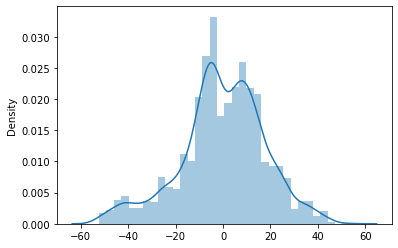

In [55]:
sns.distplot(y_test-prediction)

In [56]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [57]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-343.1309689444174


In [58]:
prediction = lasso_regressor.predict(X_test)

<AxesSubplot:ylabel='Density'>

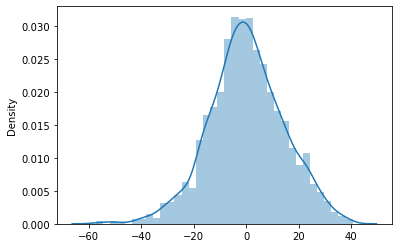

In [59]:
sns.distplot(y_test-prediction)

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 11.119955248920911
MSE: 203.82449147580928
RMSE: 14.276711507760087


In [61]:
# Creating a pickle file for the classifier
filename = 'Batting-score-LassoReg-model.pkl'
pickle.dump(lasso_regressor, open(filename, 'wb'))